<a href="https://colab.research.google.com/github/PUBPOL-2130/notebooks/blob/main/Week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Python for geospatial data science


Things to get comfortable with:
* Jupyter-style notebooks — running cells, etc.
* Basic Python syntax (see many links below)
  * `print()` statements
  * Data types: numbers (`int`, `float`), strings (`str`), lists, dictionaries, sets
  * Basic math
  * Variables
  * Functions
* Plotting with Matplotlib
* Pandas (and [GeoPandas](https://geopandas.org/en/stable/)) DataFrames


## Resources



* Python
  * [DataCamp's interactive Intro to Python tutorial](https://www.learnpython.org/)
  * [Python for Everybody (University of Michigan MOOC)](https://www.py4e.com/lessons)
  * [A short Python and NumPy tutorial (Stanford CS231)](http://cs231n.github.io/python-numpy-tutorial/)
  * [Official Python tutorial](https://docs.python.org/3/tutorial/index.html)
  * [Jake VanderPlas' _A Whirlwind Tour of Python_](https://github.com/jakevdp/WhirlwindTourOfPython/tree/master?tab=readme-ov-file) (particularly chapters 1–8)
  * [Cornell CS 1110 lecture videos (Fall 2020)](https://vod.video.cornell.edu/channel/CS+1110+Fall+2020/179890731)
* Pandas
    * [10 minutes to pandas](https://pandas.pydata.org/docs/user_guide/10min.html)
    * [Official pandas tutorials](https://pandas.pydata.org/docs/getting_started/index.html#intro-to-pandas)
    * [Data Manipulation with Pandas (chapter 3 of VanderPlas' *Python Data Science Handbook*)](https://jakevdp.github.io/PythonDataScienceHandbook/03.00-introduction-to-pandas.html)
    * [Introduction to GeoPandas](https://github.com/geopandas/geopandas/blob/main/doc/source/getting_started/introduction.ipynb) (Jupyter notebook)
    * [Comparison with R / R libraries](https://pandas.pydata.org/docs/getting_started/comparison/comparison_with_r.html) (a handy Rosetta stone if you've previously used R!)
* Matplotlib
  * [Official Pyplot tutorial (short)](https://matplotlib.org/tutorials/introductory/pyplot.html)
  * [Visualization with Matplotlib (chapter 4 of VanderPlas' *Python Data Science Handbook*)](https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html)
  * [Gallery of Matplotlib examples](https://matplotlib.org/gallery/index.html)

   

## Manipulating tabular data with Pandas

[Pandas](https://pandas.pydata.org/) is a popular Python package for manipulating tabular data. Pandas is oriented around the concept of a [DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html), which is [analogous to a spreadsheet](https://pandas.pydata.org/docs/getting_started/comparison/comparison_with_spreadsheets.html). Indeed, Pandas supports most of the data manipulations possible in tools like Microsoft Excel or Google Sheets, but with a programmatic interface instead of a visual interface. Pandas `DataFrame` objects are also similar to [R data frames](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/data.frame).


### Importing
Conventionally, we import `pandas` with the shorter name `pd`.

In [31]:
import pandas as pd

### Initializing a DataFrame

While in practice we'll often initialize DataFrames from external files (see [pandas.read_csv()](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)), we can also simply specify the values in each column to initialize a DataFrame.

In [32]:
df = pd.DataFrame({
    "id": [
        "PUBPOL 2301",
        "PUBPOL 2130",
        "PUBPOL 2320",
        "INFO 2951",
    ],
    "name": [
        "Introduction to Public Policy",
        "Data and the State: How Governments See People and Places",
        "Global Democracy and Public Policy",
        "Introduction to Data Science with R",
    ],
    "instructor": ["Laura Tach", "Moon Duchin", "Rachel Riedl", "Benjamin Soltoff"],
    "credits": [4., 4., 3., 4.],
})
df

,id,name,instructor,credits
0,PUBPOL 2301,Introduction to Public Policy,Laura Tach,4.0
1,PUBPOL 2130,Data and the State: How Governments See People...,Moon Duchin,4.0
2,PUBPOL 2320,Global Democracy and Public Policy,Rachel Riedl,3.0
3,INFO 2951,Introduction to Data Science with R,Benjamin Soltoff,4.0


It's easy to add new columns after initialization!

In [33]:
df["enrollment_cap"] = [60, 80, 100, 120]
df

,id,name,instructor,credits,enrollment_cap
0,PUBPOL 2301,Introduction to Public Policy,Laura Tach,4.0,60
1,PUBPOL 2130,Data and the State: How Governments See People...,Moon Duchin,4.0,80
2,PUBPOL 2320,Global Democracy and Public Policy,Rachel Riedl,3.0,100
3,INFO 2951,Introduction to Data Science with R,Benjamin Soltoff,4.0,120


### Rows, columns, and indices

Pandas infers the data type of each column from the provided values.

In [34]:
df.dtypes

id                 object
name               object
instructor         object
credits           float64
enrollment_cap      int64
dtype: object

We can generate summary statistics for the numerical columns.

In [35]:
df.describe()

,credits,enrollment_cap
count,4.00,4.000000
mean,3.75,90.000000
std,0.50,25.819889
min,3.00,60.000000
25%,3.75,75.000000
50%,4.00,90.000000
75%,4.00,105.000000
max,4.00,120.000000


We can use `.head()` and `.tail()` to inspect a DataFrame.

In [36]:
df.head(4)  # Shows the first 2 rows

,id,name,instructor,credits,enrollment_cap
0,PUBPOL 2301,Introduction to Public Policy,Laura Tach,4.0,60
1,PUBPOL 2130,Data and the State: How Governments See People...,Moon Duchin,4.0,80
2,PUBPOL 2320,Global Democracy and Public Policy,Rachel Riedl,3.0,100
3,INFO 2951,Introduction to Data Science with R,Benjamin Soltoff,4.0,120


In [37]:
df.tail(4)  # Shows the last 2 rows

,id,name,instructor,credits,enrollment_cap
0,PUBPOL 2301,Introduction to Public Policy,Laura Tach,4.0,60
1,PUBPOL 2130,Data and the State: How Governments See People...,Moon Duchin,4.0,80
2,PUBPOL 2320,Global Democracy and Public Policy,Rachel Riedl,3.0,100
3,INFO 2951,Introduction to Data Science with R,Benjamin Soltoff,4.0,120


We can inspect the values in a single column...

In [38]:
df["instructor"]

0          Laura Tach
1         Moon Duchin
2        Rachel Riedl
3    Benjamin Soltoff
Name: instructor, dtype: object

...or in multiple columns.

In [39]:
df[["name", "credits"]]

,name,credits
0,Introduction to Public Policy,4.0
1,Data and the State: How Governments See People...,4.0
2,Global Democracy and Public Policy,3.0
3,Introduction to Data Science with R,4.0


Pandas will automatically generate an _index column_ that gives a unique ID for each row.

In [40]:
df.loc[0]

id                                  PUBPOL 2301
name              Introduction to Public Policy
instructor                           Laura Tach
credits                                     4.0
enrollment_cap                               60
Name: 0, dtype: object

In [41]:
df.loc[0]["name"]

'Introduction to Public Policy'

In [42]:
df.loc[0]["credits"] + df.loc[1]["credits"]

8.0

We can override the default index and choose the **index column** ourselves. Generally, it's best for the index values to be short, unique identifiers for each row, but this is not strictly necessary.  The index column is very important, because it's the main way we'll organize our table operations. The choice will be remembered in the notebook and will be important when we join data from different tables.

IMPORTANT:  when you set a column as the index column, it's no longer treated as a regular column.  So if you change this several times, you're losing data!

In [43]:
df = df.set_index("id")
df

,name,instructor,credits,enrollment_cap
id,,,,
PUBPOL 2301,Introduction to Public Policy,Laura Tach,4.0,60
PUBPOL 2130,Data and the State: How Governments See People...,Moon Duchin,4.0,80
PUBPOL 2320,Global Democracy and Public Policy,Rachel Riedl,3.0,100
INFO 2951,Introduction to Data Science with R,Benjamin Soltoff,4.0,120


In [44]:
# this will only work if we choose the ID from the index column
df.loc["PUBPOL 2130"]

name              Data and the State: How Governments See People...
instructor                                              Moon Duchin
credits                                                         4.0
enrollment_cap                                                   80
Name: PUBPOL 2130, dtype: object

# Saving your data

There are many different file formats and ways to save your data once it's in tabular form. We will highlight two easy and standard approaches.

### Comma-Separated Values
A **CSV**, which stands for [comma-separated values](https://en.wikipedia.org/wiki/Comma-separated_values), is a widely used format for storing and sharing tabular data. Different data values are delineated by commas while new records (i.e., rows in the tabular data) are delineated by new lines. Typically, these files are easy to open in programs like Excel or Google Sheets. We will use CSVs frequently throughout the class. 

You can save a Pandas dataframe to a CSV using the function [`to_csv`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html)

In [45]:
# export your dataframe to csv and save it as lab1.csv
df.to_csv("lab1.csv")

### JavaScript Object Notation
Another common format is **JSON**, which stands for [JavaScript Object Notation](https://en.wikipedia.org/wiki/JSON). JSON files store data using key-value pairs and arrays. They are similarly flexible and easy to use. GeoJSON formats, which are based on JSON but have geographical attributes, are very common when working with spatial data.

You can save a Pandas dataframe to JSON using the function [`to_json`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_json.html). For readability, we will `print()` the JSON output.

In [46]:
print(df.to_json())

{"name":{"PUBPOL 2301":"Introduction to Public Policy","PUBPOL 2130":"Data and the State: How Governments See People and Places","PUBPOL 2320":"Global Democracy and Public Policy","INFO 2951":"Introduction to Data Science with R"},"instructor":{"PUBPOL 2301":"Laura Tach","PUBPOL 2130":"Moon Duchin","PUBPOL 2320":"Rachel Riedl","INFO 2951":"Benjamin Soltoff"},"credits":{"PUBPOL 2301":4.0,"PUBPOL 2130":4.0,"PUBPOL 2320":3.0,"INFO 2951":4.0},"enrollment_cap":{"PUBPOL 2301":60,"PUBPOL 2130":80,"PUBPOL 2320":100,"INFO 2951":120}}


# Plotting with Matplotlib

Matplotlib is another essential package in the Python data science ecosystem. Matplotlib can generate almost any 2D plot imaginable (see the [examples gallery](https://matplotlib.org/stable/gallery/index.html)), and it's tightly integrated with Pandas and GeoPandas.


### Importing
We conventionally load Matplotlib as `plt`. The examples here also use [NumPy](https://numpy.org/doc/stable/reference/) to generate large arrays of random numbers.



In [47]:
import matplotlib.pyplot as plt
import numpy as np

When working in a Jupyter notebook, it's often preferable to configure Matplotlib to emit [vector images](https://en.wikipedia.org/wiki/Vector_graphics).

In [48]:
%config InlineBackend.figure_formats = ["svg"]

### Line plots

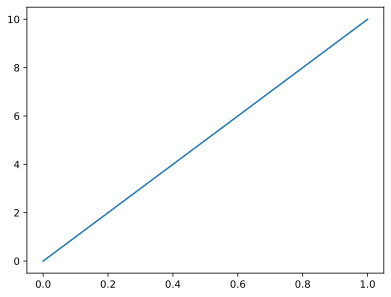

In [49]:
# I'm telling it to run through these x values while running through those y values.  The result is a line.
plt.plot([0, 1], [0, 10])
plt.show()

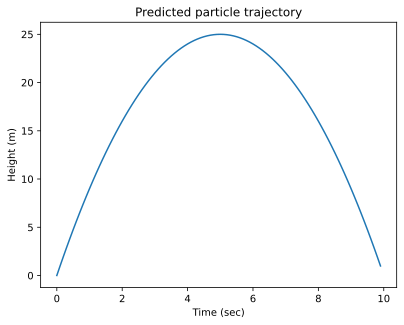

In [50]:
# I'm telling it to let t range from here to there in increments of that.
# height depends on t, and then I plot the x values and y values.
t = np.arange(0, 10, 0.1)
height = -t**2 + 10*t

fig, ax = plt.subplots()
ax.plot(t, height)
ax.set_xlabel('Time (sec)')
ax.set_ylabel('Height (m)')
ax.set_title('Predicted particle trajectory')
plt.show()

### Scatter plots

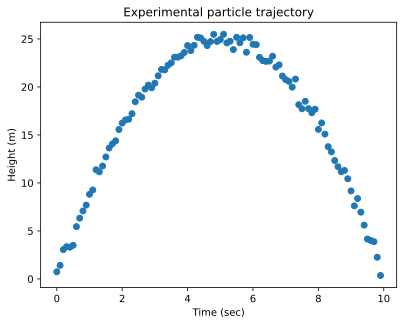

In [51]:
# I'm making my own random noise by adding a small random variable.
# try changing the coefficient to see the effects of smaller and larger noise!
noisy_height = height + 0.5 * np.random.randn(height.size)

fig, ax = plt.subplots()
ax.scatter(t, noisy_height)
ax.set_xlabel('Time (sec)')
ax.set_ylabel('Height (m)')
ax.set_title('Experimental particle trajectory')
plt.show()

### Mixing and matching

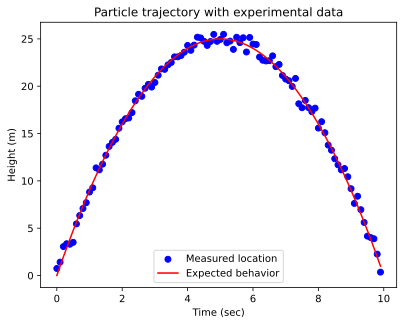

In [52]:
# I can plot more than one thing on the same plot.
fig, ax = plt.subplots()
ax.scatter(t, noisy_height, label='Measured location', color='blue')
ax.plot(t, height, label='Expected behavior', color='red')

ax.set_xlabel('Time (sec)')
ax.set_ylabel('Height (m)')
ax.set_title('Particle trajectory with experimental data')
ax.legend(loc='lower center')

plt.show()

### Histograms

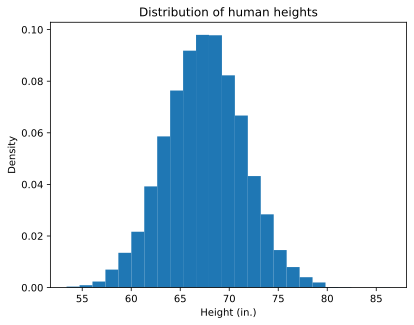

In [53]:
# Here I'm actually constructing a normal distribution and calling it "human heights" for illustrative purposes.
#It is true though that heights (and lots of other things) tend to be normally distributed on appropriate sub-populations.
random_heights = 67.5 + 4 * np.random.randn(10000)

fig, ax = plt.subplots()
ax.hist(random_heights, bins=25, density=True)
ax.set_title('Distribution of human heights')
ax.set_xlabel('Height (in.)')
ax.set_ylabel('Density')
plt.show()

## Combining Pandas and Matplotlib

Pandas includes wrappers for most basic Matplotlib plot types. We can generate histograms, bar charts, pie charts, and the like from DataFrames.

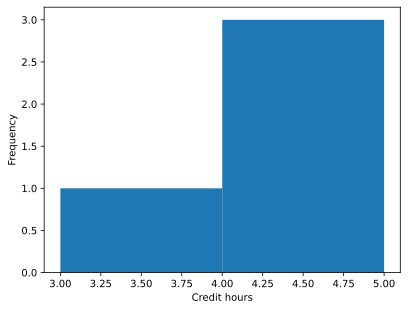

In [54]:
# This takes the credit hours from the course table above and plots them as a histogram.
ax = df["credits"].plot.hist(bins=range(3, 6))
ax.set_xlabel("Credit hours")
plt.show()

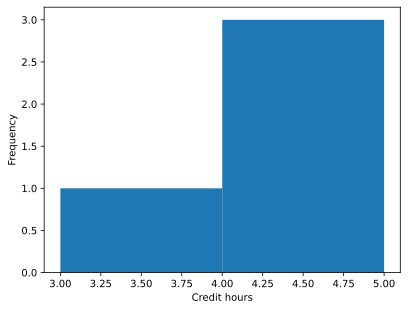

In [55]:
# What if you want better x axis labels?  The value represented by each bar should appear centered on the bar...
# TODO
ax = df["credits"].plot.hist(bins=range(3, 6))
ax.set_xlabel("Credit hours")
plt.show()

Now let's look at the dataframe again.

In [56]:
df

,name,instructor,credits,enrollment_cap
id,,,,
PUBPOL 2301,Introduction to Public Policy,Laura Tach,4.0,60
PUBPOL 2130,Data and the State: How Governments See People...,Moon Duchin,4.0,80
PUBPOL 2320,Global Democracy and Public Policy,Rachel Riedl,3.0,100
INFO 2951,Introduction to Data Science with R,Benjamin Soltoff,4.0,120


Next, let's create a new column that is obtained by parsing the previous content.  We'll tell it to take the first chunk of the `id` column, up to the space, and interpret that as the department.

In [57]:
df["department"] = df.index.str.split(" ").str[0]
df

,name,instructor,credits,enrollment_cap,department
id,,,,,
PUBPOL 2301,Introduction to Public Policy,Laura Tach,4.0,60,PUBPOL
PUBPOL 2130,Data and the State: How Governments See People...,Moon Duchin,4.0,80,PUBPOL
PUBPOL 2320,Global Democracy and Public Policy,Rachel Riedl,3.0,100,PUBPOL
INFO 2951,Introduction to Data Science with R,Benjamin Soltoff,4.0,120,INFO


Now we can group by department.

Text(0.5, 1.0, 'Courses by department')

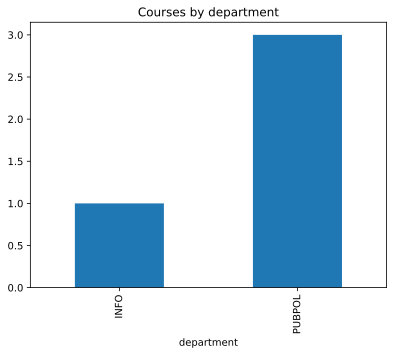

In [58]:
ax = df.groupby("department").size().plot.bar()
ax.set_title("Courses by department")

Text(0.5, 1.0, 'Courses by department')

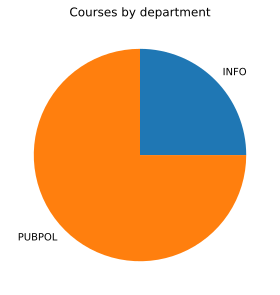

In [59]:
ax = df.groupby("department").size().plot.pie()
ax.set_ylabel("")
ax.set_title("Courses by department")